# Imports

In [25]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import math

## Código

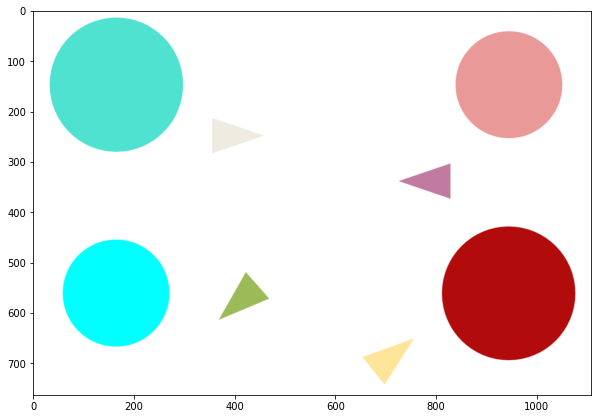

In [26]:
#pegando imagem original dada pelo professor
oImg = cv2.imread('circulo.png')

#gerando rgb da oImg
oImg_rgb = cv2.cvtColor(oImg, cv2.COLOR_BGR2RGB)

#Renderizando
plt.figure(figsize = (10,10))
plt.imshow(oImg_rgb)

# R1

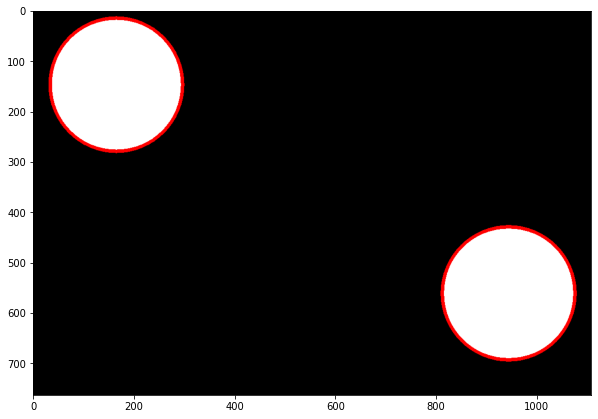

In [27]:
#pegando imagen original dada pelo professor
img = cv2.imread('circulo.png')

#gerando hsv da oImg
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

image_lower_azul = np.array([0, 150, 100])  
image_upper_azul = np.array([250, 250, 245])


mask_hsv = cv2.inRange(img_hsv, image_lower_azul, image_upper_azul)


contour, _ = cv2.findContours(mask_hsv, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 


mask_rgb = cv2.cvtColor(mask_hsv, cv2.COLOR_GRAY2RGB) 
# gerando copia da mascara para desenhar
contour_img = mask_rgb.copy()

#desenhando a imagen contornada
cv2.drawContours(contour_img, contour, -1, [255, 0, 0], 5);

#plotando resultado
plt.figure(figsize = (10,10))  
plt.imshow(contour_img);

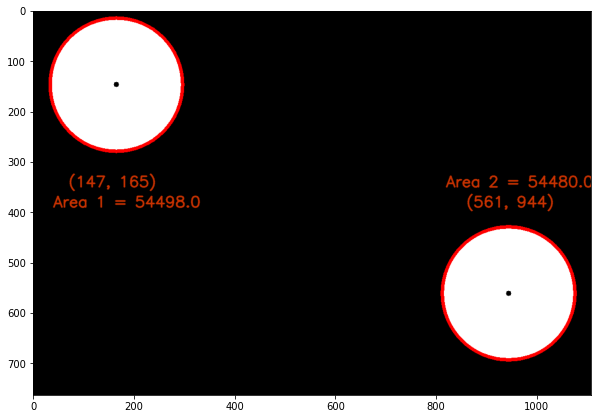

In [28]:
color = (0,0,0)
color2 = (156, 184, 255)

# Calculo das coordenadas do centro 1
cnt = contour[0]
M = cv2.moments(cnt)

cx1 = int(M['m10']/M['m00'])
cy1 = int(M['m01']/M['m00'])
cv2.line(contour_img,(cx1,cy1),(cx1,cy1),color,10)


# Calculo das coordenadas do centro 2
cnt2 = contour[1]
M2 = cv2.moments(cnt2)

cx2 = int(M2['m10']/M2['m00'])
cy2 = int(M2['m01']/M2['m00'])
cv2.line(contour_img,(cx2,cy2),(cx2,cy2),color,10)


# Calculo das areas
area1 = cv2.contourArea(cnt)
area2 = cv2.contourArea(cnt2)


# Textos
font1 = cv2.FONT_HERSHEY_SIMPLEX
text1 = cy2 , cx2
origin1 = (70,350)
cv2.putText(contour_img, str(text1), origin1, font1,1,(200,50,0),2,cv2.LINE_AA)

font2 = cv2.FONT_HERSHEY_SIMPLEX
text2 = cy1 , cx1
origin2 = (860,390)
cv2.putText(contour_img, str(text2), origin2, font2,1,(200,50,0),2,cv2.LINE_AA)


# Textos das areas
font_area1 = cv2.FONT_HERSHEY_SIMPLEX
text_area1 = "Area 1 = {}".format(area1)
origin_area1 = (40,390)
cv2.putText(contour_img, str(text_area1), origin_area1, font_area1,1,(200,50,0),2,cv2.LINE_AA)

font_area2 = cv2.FONT_HERSHEY_SIMPLEX
text_area2 = "Area 2 = {}".format(area2)
origin_area2 = (820,350)
cv2.putText(contour_img, str(text_area2), origin_area2, font_area2,1,(200,50,0),2,cv2.LINE_AA)


# Retorno imagem e informacoes obtidas 
plt.figure(figsize = (10,10))  
plt.imshow(contour_img);

# R2

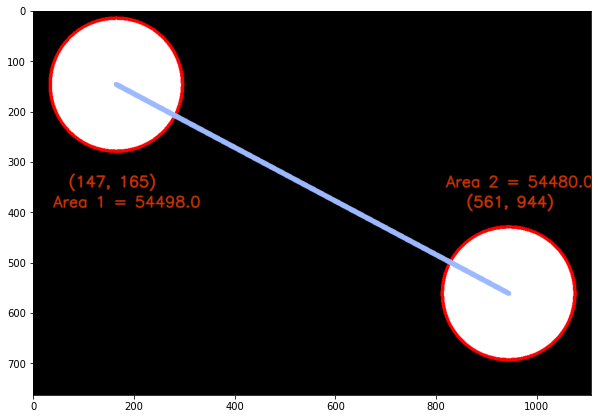

In [29]:

color = (0,0,0)
color2 = (156, 184, 255)

#Calculando coordenadas da massa 1
cnt = contour[0]
M = cv2.moments(cnt)

cx1 = int(M['m10']/M['m00'])
cy1 = int(M['m01']/M['m00'])

#Calculando coordenadas da massa 2
cnt2 = contour[1]
M2 = cv2.moments(cnt2)

cx2 = int(M2['m10']/M2['m00'])
cy2 = int(M2['m01']/M2['m00'])

#Textos com a areas
font1 = cv2.FONT_HERSHEY_SIMPLEX
text1 = cy2, cx2
origin1 = (70,350)
cv2.putText(contour_img, str(text1), origin1, font2,1,(200,50,0),2,cv2.LINE_AA)

font2 = cv2.FONT_HERSHEY_SIMPLEX
text2 = cy1 , cx1
origin2 = (860,390)
cv2.putText(contour_img, str(text2), origin2, font2,1,(200,50,0),2,cv2.LINE_AA)

#Linha entre os pontos encontrados
line = cv2.line(contour_img,(cx1,cy1),(cx2,cy2),color2,10)


plt.figure(figsize = (10,10))  
plt.imshow(contour_img)

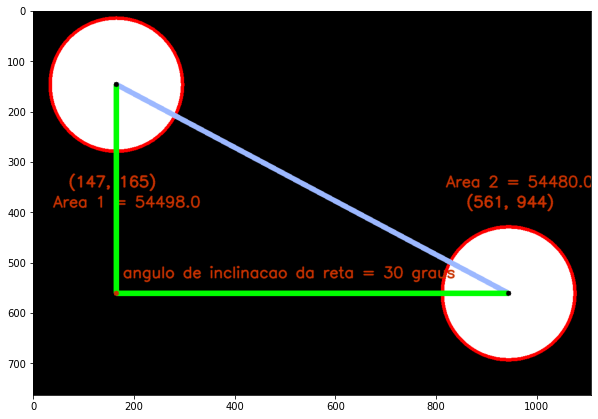

In [30]:
color = (0,0,0)
color2 = (156, 184, 255)
color3 = (0, 255, 0)
color4 = (200,50,0)

#Calculando coordenadas da massa 1
cnt = contour[0]
M = cv2.moments(cnt)

cx1 = int(M['m10']/M['m00'])
cy1 = int(M['m01']/M['m00'])


#Calculando coordenadas da massa 2
cnt2 = contour[1]
M2 = cv2.moments(cnt2)

cx2 = int(M2['m10']/M2['m00'])
cy2 = int(M2['m01']/M2['m00'])

# Textos
font1 = cv2.FONT_HERSHEY_SIMPLEX
text1 = cy2 , cx2
origin1 = (70,350)
cv2.putText(contour_img, str(text1), origin1, font2,1,(200,50,0),2,cv2.LINE_AA)


font2 = cv2.FONT_HERSHEY_SIMPLEX
text2 = cy1 , cx1
origin2 = (860,390)
cv2.putText(contour_img, str(text2), origin2, font2,1,(200,50,0),2,cv2.LINE_AA)



# Linha entre os pontos
line = cv2.line(contour_img,(cx1,cy1),(cx2,cy2),color2,10)


# Linhas a mais do para formar um triangulo triangulo
cv2.line(contour_img,(cx1,cy1),(cx2,cy1),color3,10)
cv2.line(contour_img,(cx2,cy2),(cx2,cy1),color3,10)

# pontos
cv2.line(contour_img,(cx1,cy1),(cx1,cy1),color,10)
cv2.line(contour_img,(cx2,cy2),(cx2,cy2),color,10)
cv2.line(contour_img,(cx2,cy1),(cx2,cy1),color4,10)

#Calculando Angulo
inclination = (cy2-cy1)/(cx2-cx1)
angle = round(math.degrees(inclination))


font3 = cv2.FONT_HERSHEY_SIMPLEX
text3 = "angulo de inclinacao da reta = {} graus".format(angle)
origem3 = (178,530)
cv2.putText(contour_img, str(text3), origem3, font3,1,(200,50,0),2,cv2.LINE_AA)

plt.figure(figsize = (10,10))
plt.imshow(contour_img)
